In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#importing the dataset
dataset = pd.read_csv('C:\\Users\\Dell\\Downloads\\dataset\\Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:,-1].values

In [4]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y) # need to make this column as vertical so below step

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [6]:
y = y.reshape(len(y),1)

In [7]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [8]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)


In [9]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [11]:
#Training the SVR Model on the whole dataset
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x,y)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [13]:
#  Predicting a new result
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

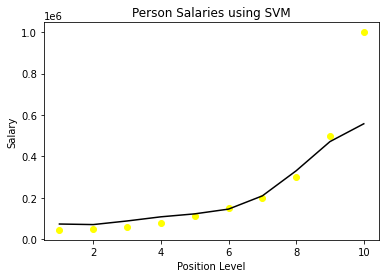

In [22]:
#visualizing the SVR Results
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='yellow')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)),color='black')
plt.title('Person Salaries using SVM')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()